# Lending Club Case Study

Group Members
1. Anshuman Tripathi
2. Vivek A V

#### Loading Data

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

loan_data = pd.read_csv('loan.csv')
loan_data.head()

/home/vivek/Documents/Projects/UpGrad-PGDML/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data cleaning

### Dropping unwanted columns. 

Since these columns have either not been set or is the same value for all of the candidates, The can be and should be ignored as they have no impact on the analysis.
![Columns to ignore](img/columns_to_ignore.PNG)

In [2]:
loan_data = loan_data.drop(columns=[
    'pymnt_plan',
    'initial_list_status',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'application_type',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'acc_now_delinq',
    'tot_coll_amt',
    'tot_cur_bal',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'acc_open_past_24mths',
    'avg_cur_bal',
    'bc_open_to_buy',
    'bc_util',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mort_acc',
    'mths_since_recent_bc',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_inq',
    'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_bc_sats',
    'num_bc_tl',
    'num_il_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'num_rev_tl_bal_gt_0',
    'num_sats',
    'num_tl_120dpd_2m',
    'num_tl_30dpd',
    'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'pct_tl_nvr_dlq',
    'percent_bc_gt_75',
    'tax_liens',
    'tot_hi_cred_lim',
    'total_bal_ex_mort',
    'total_bc_limit',
    'total_il_high_credit_limit'
])
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


**Additional assumptions made in data**
* `term` is a numerical data. So we convert it to int.
* `int_rate` (Interest rate) is a numerical data. So we convert it from percentage denoting string to float
* `revol_util` (Revolving line utilization rate) is a numerical data. So we convert it from percentage denoting string to float
* Since `zip_code` of the candidates are masked, they're little to no value for us.
* Since `next_pymnt_d` (Next Payment Date) is significantly low in number, dropping the column.
* `emp_title` which represents the Employee Title of the candidate has lot of missing values and almost allof them are unique which makes it unusable for analysis.
* `title` and `desc` (Description) has been merged composed into categorical value `purpose`, so we can drop the former two.
* Since `recoveries`(Recoveries) & `collection_recovery_fee` (Collection Recovery Fee) are post CHARGE OFF, It does not make sense to include them in analysis.

In [3]:
loan_data.term = loan_data.term.apply(lambda x : int(x[0:3]))
loan_data.int_rate = loan_data.int_rate.apply(lambda x : float(x[:-1]))
loan_data.revol_util = loan_data.revol_util.apply(lambda x : x[:-1] if isinstance(x, str) else x)
loan_data = loan_data.drop(columns=['url'])
loan_data = loan_data.drop(columns=['zip_code'])
loan_data = loan_data.drop(columns=['next_pymnt_d'])
loan_data = loan_data.drop(columns=['emp_title'])
loan_data = loan_data.drop(columns=['title', 'desc'])
loan_data = loan_data.drop(columns=['recoveries', 'collection_recovery_fee'])
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,May-16,67.79,May-16,0.0


# Useful Attributes

### Categorical :
    1. grade
    2. sub_grade
    3. emp_length
    4. home_ownership
    5. verification_status
    6. earliest_cr_line
    7. purpose
    8. addr_state
    9. loan_status

### Numerical :
    1. loan_amnt
    2. funded_amnt
    3. funded_amnt_inv
    4. term
    5. int_rate
    6. installment
    7. annual_inc
    8. dti
    9. delinq_2yrs
    10. pub_rec
    11. open_acc
    12. total_acc
    13. out_prncp
    14. total_pymnt
    15. total_rec_prncp
    16. total_rec_int
    17. total_rec_late_fee
    18. pub_rec_bankruptcies

**We started with 111 attributes and now we are left with 40 attributes! Out of which we chose 9 categorical variables and 18 numeric variables for further analysis**


**Please note that further analysis is not strictly based on these variables, we choose these variables to focus our analysis**

Let's write the new data to a file

In [4]:
loan_data.to_csv('loan_cleaned.csv', index=False)

### Scanning the Dataset for missing values

In [5]:
print(f'1. Missing values in Loan Grade = {round(loan_data.grade.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'2. Missing values in Loan Sub Grade = {round(loan_data.sub_grade.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'3. Missing values in Employee Duration = {round(loan_data.emp_length.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'4. Missing values in House Ownership = {round(loan_data.home_ownership.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'5. Missing values in Verification Status = {round(loan_data.verification_status.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'6. Missing values in Earliest Credit Line = {round(loan_data.earliest_cr_line.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'7. Missing values in Purpose of Loan = {round(loan_data.purpose.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'8. Missing values in State = {round(loan_data.addr_state.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'9. Missing values in Loan Status = {round(loan_data.loan_status.isna().sum() * 100 / loan_data.id.count(), 2)}%')

1. Missing values in Loan Grade = 0.0%
2. Missing values in Loan Sub Grade = 0.0%
3. Missing values in Employee Duration = 2.71%
4. Missing values in House Ownership = 0.0%
5. Missing values in Verification Status = 0.0%
6. Missing values in Earliest Credit Line = 0.0%
7. Missing values in Purpose of Loan = 0.0%
8. Missing values in State = 0.0%
9. Missing values in Loan Status = 0.0%


**In Categorical Variables, Only the `emp_length` attribute has 2.71% missing values, which is very much acceptable. We try not to exaggerate the data by filling it up.**

In [6]:
print(f'1. Missing values in Loan Amount = {round(loan_data.loan_amnt.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'2. Missing values in Amount Funded = {round(loan_data.funded_amnt.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'3. Missing values in Amount Commited by Investors = {round(loan_data.funded_amnt_inv.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'4. Missing values in Loan Duration = {round(loan_data.term.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'5. Missing values in Interest Rate = {round(loan_data.int_rate.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'6. Missing values in Installment Amount = {round(loan_data.installment.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'7. Missing values in Annual Income = {round(loan_data.annual_inc.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'8. Missing values in DTI = {round(loan_data.dti.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'9. Missing values in Delinquency in 2 years = {round(loan_data.delinq_2yrs.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'10. Missing values in Deroagatory Public Records = {round(loan_data.pub_rec.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'11. Missing values in Open Credit Accounts = {round(loan_data.open_acc.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'12. Missing values in Total Credit Accounts = {round(loan_data.total_acc.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'13. Missing values in Outstanding Principle = {round(loan_data.out_prncp.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'14. Missing values in Total Payment = {round(loan_data.total_pymnt.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'15. Missing values in Principle Recieved = {round(loan_data.total_rec_prncp.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'16. Missing values in Total Intrest Received = {round(loan_data.total_rec_int.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'17. Missing values in Total Late Fee Received = {round(loan_data.total_rec_late_fee.isna().sum() * 100 / loan_data.id.count(), 2)}%')
print(f'18. Missing values in Public Record of Bankruptcies = {round(loan_data.pub_rec_bankruptcies.isna().sum() * 100 / loan_data.id.count(), 2)}%')

1. Missing values in Loan Amount = 0.0%
2. Missing values in Amount Funded = 0.0%
3. Missing values in Amount Commited by Investors = 0.0%
4. Missing values in Loan Duration = 0.0%
5. Missing values in Interest Rate = 0.0%
6. Missing values in Installment Amount = 0.0%
7. Missing values in Annual Income = 0.0%
8. Missing values in DTI = 0.0%
9. Missing values in Delinquency in 2 years = 0.0%
10. Missing values in Deroagatory Public Records = 0.0%
11. Missing values in Open Credit Accounts = 0.0%
12. Missing values in Total Credit Accounts = 0.0%
13. Missing values in Outstanding Principle = 0.0%
14. Missing values in Total Payment = 0.0%
15. Missing values in Principle Recieved = 0.0%
16. Missing values in Total Intrest Received = 0.0%
17. Missing values in Total Late Fee Received = 0.0%
18. Missing values in Public Record of Bankruptcies = 1.75%


**In Numerical Variables, Only the `pub_rec_bankruptcies` attribute has 1.75% missing values, which is very much acceptable. We try not to exaggerate the data by filling it up.**


Let's see what percentage of loan requests were charged Off by the Lending Club or what percentage of candidates defaulted the loan.

## Univariate Analaysis on Categorical Variables

#### Let's see the percentage of loans Charged Off by Lending Club

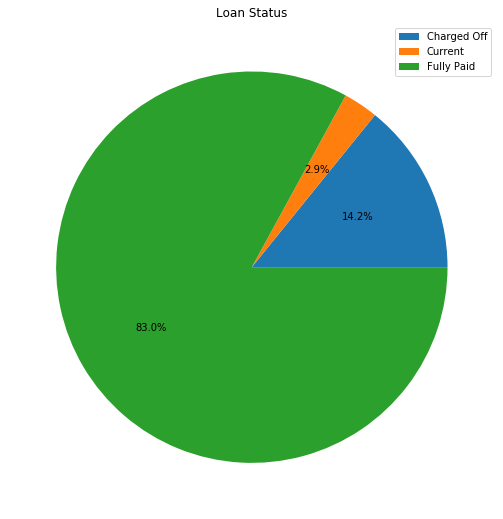

In [7]:
pie = loan_data.groupby(['loan_status']).count().plot(y='id', kind='pie', labels=None, figsize=(9, 9),autopct='%1.1f%%', title='Loan Status')
pie.set(ylabel='')
plt.show()

**14.2% Loans were Charged Off by Lending Club**

#### Let's see the distribution of grades and sub grades.

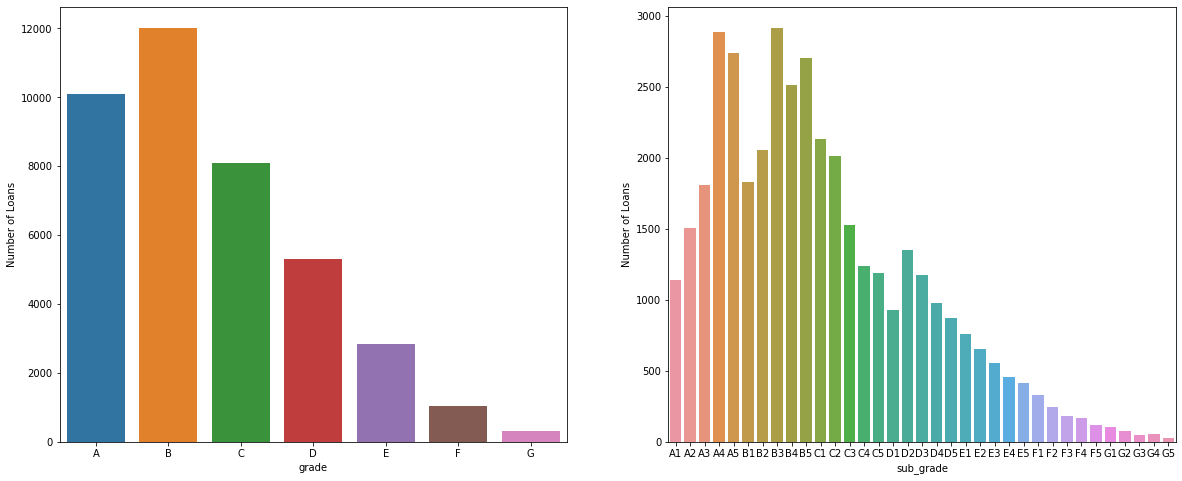

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
a = sns.barplot(x='grade', y='id', data=loan_data, estimator=lambda x: len(x), order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ax=ax[0])
b = sns.barplot(x='sub_grade', y='id', data=loan_data, estimator=lambda x: len(x), order=sorted(loan_data.sub_grade.unique()), ax=ax[1])
a.set(ylabel='Number of Loans')
b.set(ylabel='Number of Loans')
plt.show()

**The graphs shows that Lending club is intrested to pay more loans in grades A & B and the tendency decreases as the grades lower. The pattern is also visible in subgrades.**

#### Let's see what percent of loans are lended to verified sources and non verified sources

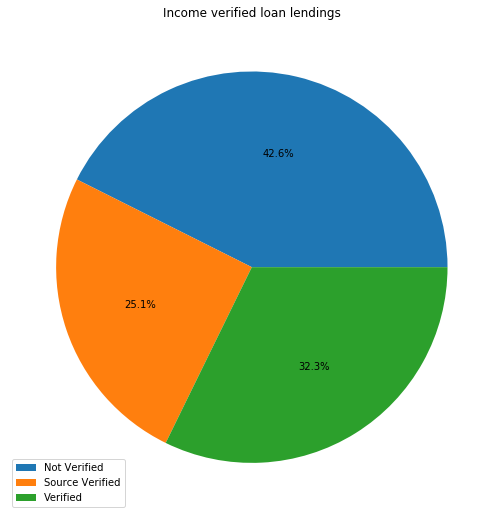

In [9]:
pie = loan_data.groupby(['verification_status']).count().plot(y='id', kind='pie', labels=None, figsize=(9, 9),autopct='%1.1f%%', title='Income verified loan lendings')
pie.set(ylabel='')
plt.show()

**42.6% of loans were lended to candidates with unverified income sources. That's something notable!!**

#### What is purpose of the loans?

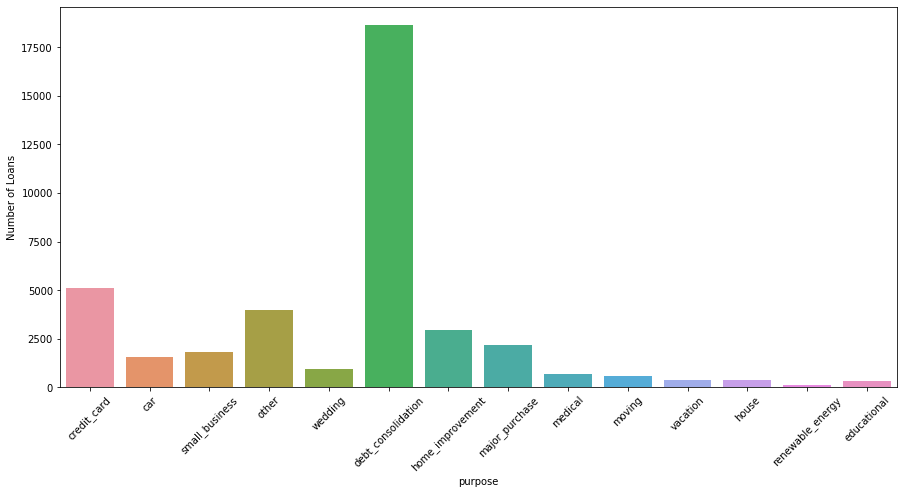

In [10]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=45)
a = sns.barplot(x='purpose', y='id', data=loan_data, estimator=lambda x: len(x))
a.set(ylabel='Number of Loans')
plt.show()

**The most number of loans were taken to pay off other loans. What an Irony!!**